In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
from sklearn.linear_model import LinearRegression
from datetime import datetime 

In [2]:
data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
display(data)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,852,852,852,852,853,853,853,853,854,854
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,92,96,113,118,130,138,140,142,148,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,513,514,611,632,639,659,661,662,671,683
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,496,524,560,591,632,705,728,844,885,902
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,141,141,162,162,163,176,176,176,197,197
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221


In [3]:
data[data[""]].loc[:,"3/31/20"]

0      174
1      243
2      716
3      376
4        7
      ... 
261      0
262      0
263      0
264      0
265      0
Name: 3/31/20, Length: 266, dtype: int64

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3114,3117,3117,3115,3119,3128,3131,3134,3135,3137
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1062,1062,1063,1064,1065,1065,1065,1065,1066,1066
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,440,440,440,440,440,440,440,440,440,440
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,228,228,228,228,228,228,228,228,228,228
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1687,1691,1699,1703,1703,1720,1732,1741,1762,1780
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,599,599,601,602,602,602,602,602,602,603


   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
8        0        0        0        0        0        0        0        0   
9        0        0        0        0        3        4        4        4   

   1/30/20  1/31/20  ...  6/8/20  6/9/20  6/10/20  6/11/20  6/12/20  6/13/20  \
8        0        0  ...     108     108      108      108      108      108   
9        4        4  ...    3114    3117     3117     3115     3119     3128   

   6/14/20  6/15/20  6/16/20  6/17/20  
8      108      108      108      108  
9     3131     3134     3135     3137  

[2 rows x 148 columns]


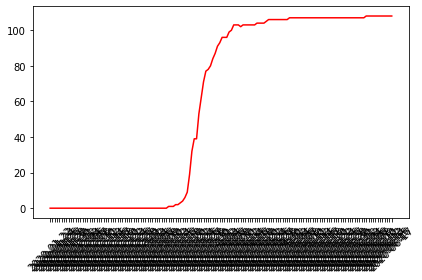

In [7]:
japan = data[data["Country/Region"] == "Australia"]
display(japan)
time_ser = japan.iloc[:2,4:]
#display(list(time_ser.iloc[0]))
fig, ax = plt.subplots()
fig.canvas.draw()
print(time_ser)
col = time_ser.iloc[0]
dates=list(time_ser)
date_object = datetime.strptime(dates[0], '%m/%d/%y')
x_values = [datetime.strptime(str(d),"%m/%d/%y").date() for d in dates]

plt.plot(dates, col, c = "red")

ax.set_xticklabels(x_values, rotation=45)
plt.tight_layout()

plt.show()


In [27]:
act = japan.iloc[:1,:]
i = 1
last = 108
now = 0
while True:
    
   # print(i)
    now = act.iloc[0,-1*i]
   # print(now,last)
    if now < last:
        display(act.iloc[:,:(-i+2)])
        break
    i+=1
    

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,108


In [28]:
da = pd.read_csv("csse_covid_19_data/csse_covid_19_daily_reports/06-15-2020.csv")
au = da[da["Country_Region"] == "Australia"]
display(au)
T_R=sum(list(da["Recovered"]))
T_D=sum(list(da["Deaths"]))
T_C=sum(list(da["Confirmed"]))
AU_R=sum(list(au["Recovered"]))
AU_D=sum(list(au["Deaths"]))

AU_A=sum(list(au["Active"]))
AU_C=sum(list(au["Confirmed"]))
print("Confirmed in AU: ",sum(list(au["Confirmed"])))
print("Recovered in AU: ",sum(list(au["Recovered"])))
print("Deaths in AU:    ",sum(list(au["Deaths"])))
print("Total Confirmed: ",sum(list(da["Confirmed"])))
print("Total Recovered: ",sum(list(da["Recovered"])))
print("Total Deaths:    ",sum(list(da["Deaths"])))
print("Total Active:    ",sum(list(da["Active"])))
print("Recover Rate:    ",np.round(T_R*100/T_C,3),"%")
print("Deaths Rate:     ",np.round(T_D*100/T_C,3),"%")
print("AU Recover Rate: ",np.round(AU_R*100/AU_C,3),"%")
print("AU Active Rate:  ",np.round(AU_A*100/AU_C,3),"%")   
print("AU Deaths Rate:  ",np.round(AU_D*100/AU_C,3),"%")        

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3106,NaN,NaN,Australian Capital Territory,Australia,2020-06-16 04:33:09,-35.4735,149.0124,108,3,104,1,"Australian Capital Territory, Australia",25.227751,2.777778
3367,NaN,NaN,New South Wales,Australia,2020-06-16 04:33:09,-33.8688,151.2093,3134,48,2768,318,"New South Wales, Australia",38.605568,1.531589
3379,NaN,NaN,Northern Territory,Australia,2020-06-16 04:33:09,-12.4634,130.8456,29,0,29,0,"Northern Territory, Australia",11.807818,0.000000
3428,NaN,NaN,Queensland,Australia,2020-06-16 04:33:09,-27.4698,153.0251,1065,6,1051,8,"Queensland, Australia",20.819079,0.563380
3486,NaN,NaN,South Australia,Australia,2020-06-16 04:33:09,-34.9285,138.6007,440,4,436,0,"South Australia, Australia",25.049815,0.909091
3499,NaN,NaN,Tasmania,Australia,2020-06-16 04:33:09,-42.8821,147.3272,228,13,213,2,"Tasmania, Australia",42.577031,5.701754
3550,NaN,NaN,Victoria,Australia,2020-06-16 04:33:09,-37.8136,144.9631,1741,19,1664,58,"Victoria, Australia",26.259823,1.091327
3561,NaN,NaN,Western Australia,Australia,2020-06-16 04:33:09,-31.9505,115.8605,602,9,591,2,"Western Australia, Australia",22.884513,1.495017


Confirmed in AU:  7347
Recovered in AU:  6856
Deaths in AU:     102
Total Confirmed:  8034504
Total Recovered:  3857339
Total Deaths:     436899
Total Active:     3667290
Recover Rate:     48.01 %
Deaths Rate:      5.438 %
AU Recover Rate:  93.317 %
AU Active Rate:   5.295 %
AU Deaths Rate:   1.388 %
